In [1]:
!pip3 install polars
!pip3 install matplotlib seaborn 

In [2]:
import polars as pl
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CLEAN_DATA = True

In [4]:
# JOIN DATASETS

if CLEAN_DATA: 
    stations = pl.read_csv("dataset/stations.csv")  
    station_day = pl.read_csv("dataset/station_day.csv")
    df = stations.join(station_day, on="StationId")
    df.write_csv("dataset/full_data.csv", separator=",")

    df = pl.read_csv("dataset/full_data.csv")
    df

In [5]:
# FILTER TO CITIES WITH MORE THAN 3 CITIES

if CLEAN_DATA: 

  df.select(["StationId", "City"]) \
      .group_by("City", "StationId").count()

  cities_wo_3sts = df.select(["StationId", "City"]).unique().group_by("City") \
    .count().filter(pl.col("count") > 3).sort("count")["City"].to_list()

  print(cities_wo_3sts)

  df = df.filter(pl.col("City").is_in(cities_wo_3sts)).select(["StationId", "City", "Date", "Status", "PM2.5", "PM10", "NOx", "CO", "SO2", "O3"])

  df.select(pl.all().is_null().sum()).drop(["StationId", "City", "Date", "Status"])

['Gurugram', 'Chennai', 'Lucknow', 'Hyderabad', 'Patna', 'Kolkata', 'Mumbai', 'Bengaluru', 'Delhi']


/var/folders/mn/g33v9wld2_g0kzmxcbjyb_yw0000gn/T/ipykernel_4576/1215633573.py:6: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .group_by("City", "StationId").count()
/var/folders/mn/g33v9wld2_g0kzmxcbjyb_yw0000gn/T/ipykernel_4576/1215633573.py:9: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .count().filter(pl.col("count") > 3).sort("count")["City"].to_list()


In [6]:
# FILTERED TO STATIONS WITH MORE THAN 500 ROWS + DROP ROWS WITH NULL VALUES + PICK CITY (DELHI)

if CLEAN_DATA: 
    temp_df = df.group_by("City", "StationId").count().sort("count").filter(pl.col("count") > 500)

    df = df.join(temp_df, on=["StationId", "City"])
    df

    df.drop_nulls().group_by("StationId", "City").count().sort("count")

    df = df.drop_nulls().filter(pl.col("City").is_in(["Delhi"]))
    print(df.shape)
    print("Unique stations in Delhi: ", len(df.select("StationId").unique()["StationId"].to_list()))

    df = df.drop("count")

    df.write_csv("dataset/cleaned_data.csv", separator=",")

(24215, 11)
Unique stations in Delhi:  27


/var/folders/mn/g33v9wld2_g0kzmxcbjyb_yw0000gn/T/ipykernel_4576/1680193469.py:4: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  temp_df = df.group_by("City", "StationId").count().sort("count").filter(pl.col("count") > 500)
/var/folders/mn/g33v9wld2_g0kzmxcbjyb_yw0000gn/T/ipykernel_4576/1680193469.py:9: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  df.drop_nulls().group_by("StationId", "City").count().sort("count")


In [7]:
df = pl.read_csv("dataset/cleaned_data.csv")
df

StationId,City,Date,Status,PM2.5,PM10,NOx,CO,SO2,O3
str,str,str,str,f64,f64,f64,f64,f64,f64
"""DL001""","""Delhi""","""2018-11-11""","""Active""",232.36,415.28,43.87,1.49,23.48,46.28
"""DL001""","""Delhi""","""2018-11-12""","""Active""",238.43,348.91,44.63,1.53,14.38,45.31
"""DL001""","""Delhi""","""2018-11-13""","""Active""",284.83,427.4,76.15,1.43,21.33,30.4
"""DL001""","""Delhi""","""2018-11-14""","""Active""",150.41,214.16,56.3,0.99,12.74,41.87
"""DL001""","""Delhi""","""2018-11-15""","""Active""",106.11,154.36,47.21,0.7,12.46,27.93
…,…,…,…,…,…,…,…,…,…
"""DL038""","""Delhi""","""2020-06-27""","""Active""",41.85,156.2,30.21,1.55,24.48,12.19
"""DL038""","""Delhi""","""2020-06-28""","""Active""",48.42,284.41,40.5,1.44,24.31,12.58
"""DL038""","""Delhi""","""2020-06-29""","""Active""",42.64,172.11,31.08,1.29,19.87,17.99


In [8]:
df = df.filter(pl.col("StationId").is_in(["DL019", "DL028", "DL002", "DL031"]))

def get_stats(column):
    return df.group_by("StationId").agg([
        pl.col(column).mean().alias(column+"_mean"),
        pl.col(column).median().alias(column+"_median"),
        pl.col(column).std().alias(column+"_std"),
        pl.col(column).var().alias(column+"_var"),
        pl.col(column).min().alias(column+"_min"),
        pl.col(column).max().alias(column+"_max")
    ])

In [9]:
get_stats("PM2.5")

StationId,PM2.5_mean,PM2.5_median,PM2.5_std,PM2.5_var,PM2.5_min,PM2.5_max
str,f64,f64,f64,f64,f64,f64
"""DL002""",152.647901,116.71,109.914795,12081.262162,9.54,624.07
"""DL028""",120.611047,89.325,96.917885,9393.076376,6.95,789.88
"""DL019""",103.672594,78.08,83.061357,6899.189053,9.09,742.0
"""DL031""",118.61756,91.61,87.838028,7715.519207,6.94,714.71


In [10]:
get_stats("PM10")

StationId,PM10_mean,PM10_median,PM10_std,PM10_var,PM10_min,PM10_max
str,f64,f64,f64,f64,f64,f64
"""DL031""",242.607021,224.07,135.151006,18265.794433,10.42,888.83
"""DL019""",198.264324,177.73,108.990228,11878.8698,25.43,826.8
"""DL002""",360.97622,338.12,184.652058,34096.382586,26.36,955.6
"""DL028""",123.72984,94.365,96.995605,9408.147409,6.95,789.88


In [11]:
get_stats("NOx")

StationId,NOx_mean,NOx_median,NOx_std,NOx_var,NOx_min,NOx_max
str,f64,f64,f64,f64,f64,f64
"""DL019""",66.075299,46.97,55.052815,3030.812398,0.0,384.52
"""DL002""",147.463983,135.4,89.992997,8098.7395,0.0,453.61
"""DL028""",79.152607,66.0,58.782458,3455.377371,0.0,337.42
"""DL031""",93.748881,80.1,65.754549,4323.66075,0.0,318.61


In [12]:
get_stats("CO")

StationId,CO_mean,CO_median,CO_std,CO_var,CO_min,CO_max
str,f64,f64,f64,f64,f64,f64
"""DL019""",1.304228,0.97,1.368307,1.872265,0.08,27.14
"""DL031""",1.839798,1.55,1.28368,1.647834,0.01,20.54
"""DL028""",1.59923,1.335,1.111152,1.234658,0.19,19.51
"""DL002""",2.187992,2.0,0.99047,0.981031,0.04,6.53


In [13]:
get_stats("SO2")

StationId,SO2_mean,SO2_median,SO2_std,SO2_var,SO2_min,SO2_max
str,f64,f64,f64,f64,f64,f64
"""DL028""",19.834799,17.305,12.553345,157.586477,2.4,129.84
"""DL031""",20.475676,16.0,14.036109,197.012355,0.68,113.3
"""DL019""",12.796608,10.51,8.787517,77.220447,1.55,63.34
"""DL002""",18.336887,16.86,10.838876,117.481237,0.94,82.57


In [14]:
get_stats("O3")

StationId,O3_mean,O3_median,O3_std,O3_var,O3_min,O3_max
str,f64,f64,f64,f64,f64,f64
"""DL028""",233.06448,206.09,143.173974,20498.786835,5.63,963.0
"""DL031""",54.678887,57.78,15.990075,255.682496,6.83,94.93
"""DL019""",23.947879,20.1,16.97755,288.2372,1.2,130.43
"""DL002""",32.180909,26.26,20.360804,414.562348,0.1,141.11


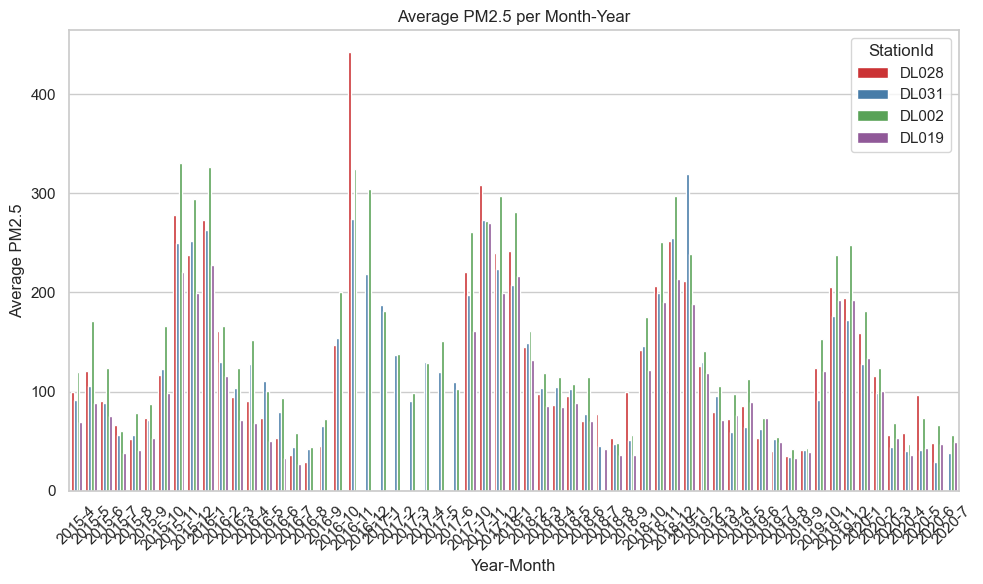

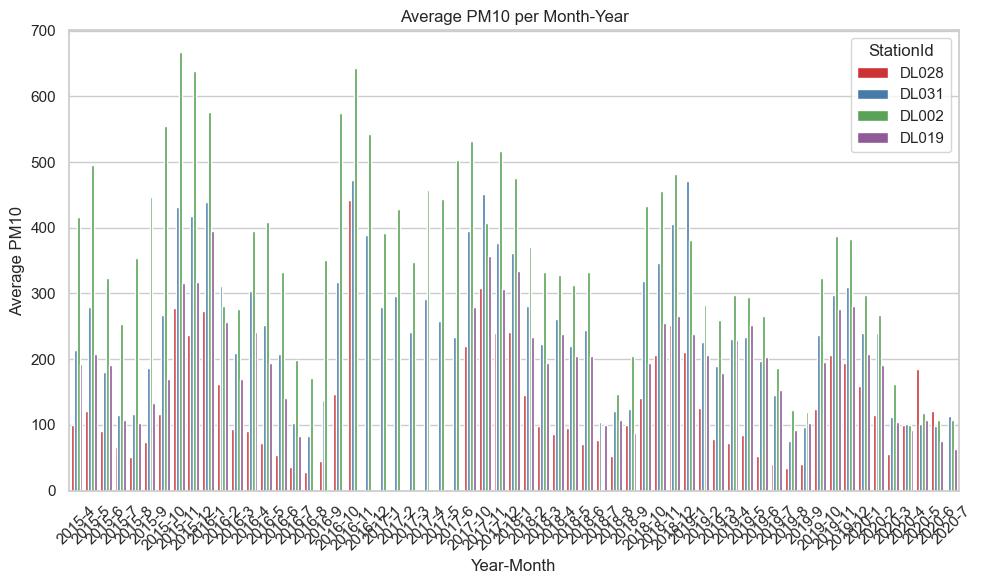

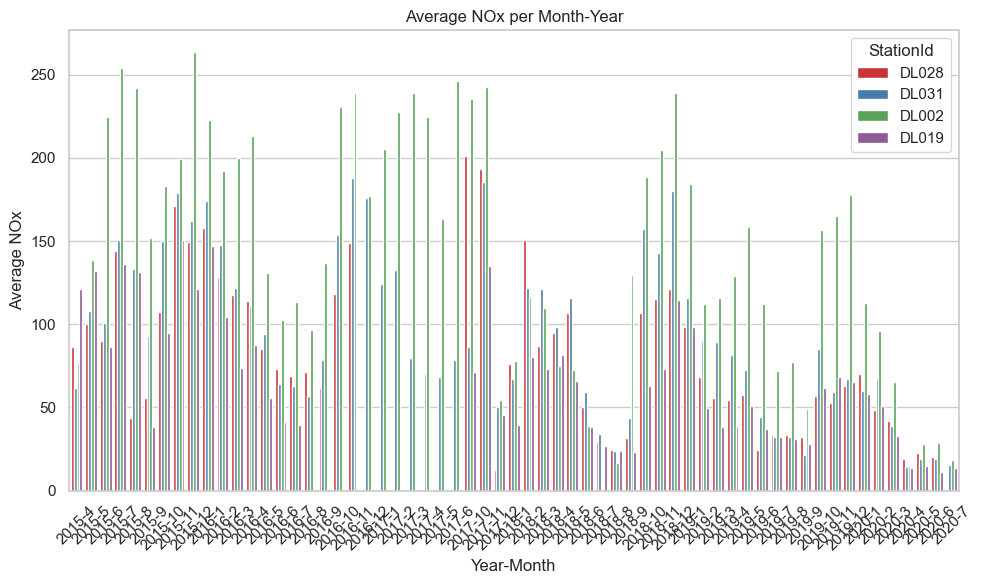

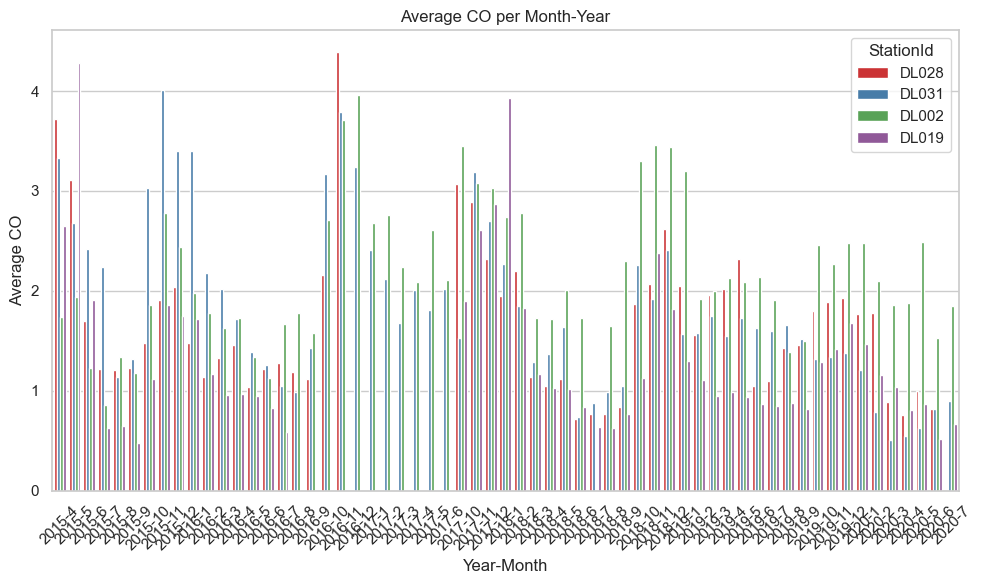

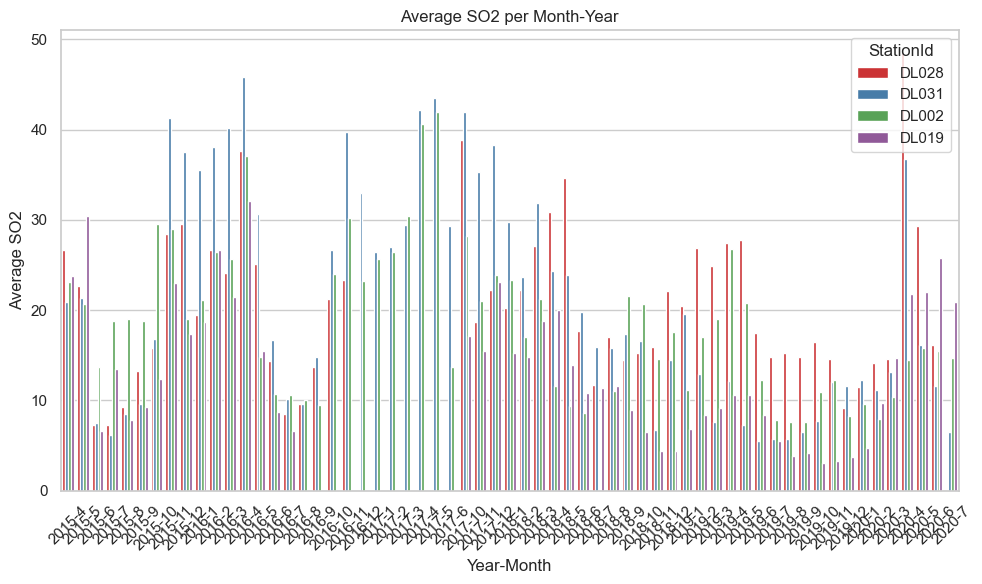

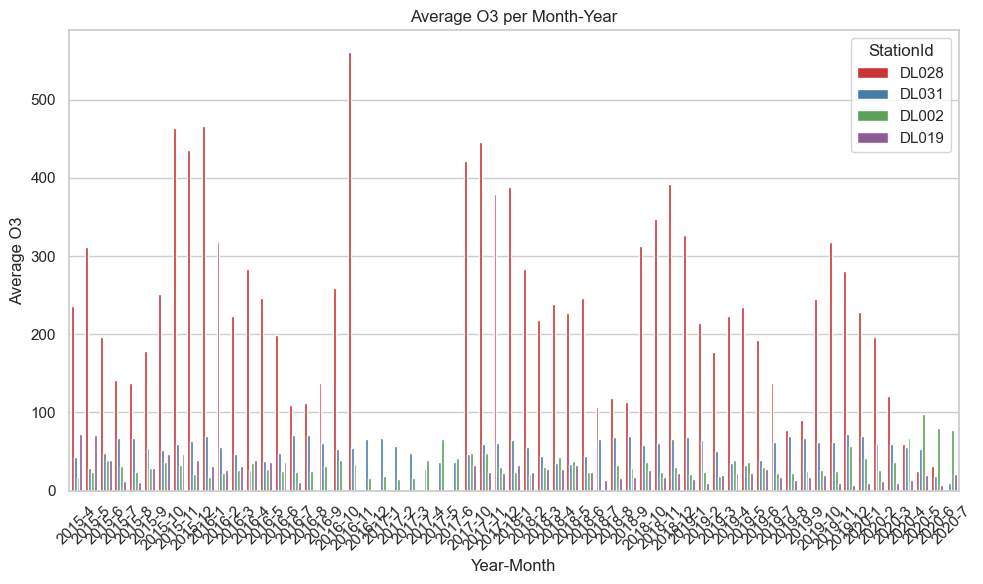

In [15]:
air_metrics = ["PM2.5", "PM10", "NOx", "CO", "SO2", "O3"]

df_avg = df.with_columns(pl.col('Date').str.to_datetime().cast(pl.Date)) \
    .with_columns(pl.col("Date").dt.month().alias("month")) \
    .with_columns(pl.col("Date").dt.year().alias("year")) \
    .with_columns(pl.concat_str([pl.col("year"), pl.col("month")], separator="-").alias("y-m")) \
    .group_by("StationId", "y-m", "month", "year").agg([pl.col(metric).mean().alias(metric) for metric in air_metrics]) \
    .sort("year", "month")

sns.set(style="whitegrid")

for metric in air_metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="y-m", y=metric, hue="StationId", data=df_avg,
        palette="Set1"
    )
    
    plt.title(f"Average {metric} per Month-Year")
    plt.ylabel(f"Average {metric}")
    plt.xlabel("Year-Month")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()